<a href="https://colab.research.google.com/github/marcusvpimentel/Mestrado/blob/main/aula3a_multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_wine
dataset = load_wine()
X, y = dataset.data, dataset.target
X.shape, y.shape

((178, 13), (178,))

In [2]:
set(y)

{0, 1, 2}

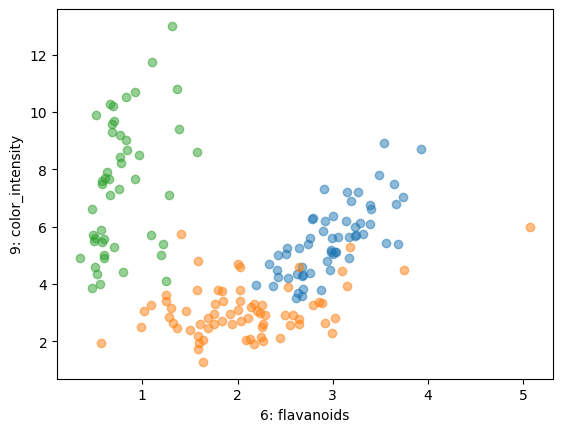

In [3]:
import matplotlib.pyplot as plt
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)
plt.show()

In [4]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
class knn(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.X = X
    self.y = y
  def distancia(self, x):
    diferenca = self.X - x
    quadrado = diferenca**2
    soma = np.sum(quadrado, axis=1)
    raiz = np.sqrt(soma)
    return raiz
  def predict(self, X):
    ypred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distancias = self.distancia(X[i])
      vizinho = np.argmin((distancias))
      ypred[i] = self.y[vizinho]
    return ypred


In [5]:
from sklearn.metrics import accuracy_score
modelo = knn()
modelo.fit(X, y)
accuracy_score(y, modelo.predict(X))

1.0

In [6]:
from sklearn.model_selection import cross_validate
cross_validate(knn(), X, y)

{'fit_time': array([8.29696655e-05, 7.17639923e-05, 5.34057617e-05, 5.19752502e-05,
        6.03199005e-05]),
 'score_time': array([0.00149035, 0.00131488, 0.00119972, 0.00122643, 0.00125813]),
 'test_score': array([0.80555556, 0.63888889, 0.66666667, 0.68571429, 0.82857143])}

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3)
modelo = knn()
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
confusion_matrix(yte, ypred)

array([[15,  3,  3],
       [ 3, 14,  7],
       [ 0,  3,  6]])

In [8]:
from sklearn.metrics import f1_score
f1_score(yte, ypred, average="macro")

0.6285314685314686

In [9]:
sum(y==0), sum(y==1), sum(y==2)

(59, 71, 48)

In [10]:
cross_validate(knn(), X, y, scoring="f1_macro")

{'fit_time': array([9.39369202e-05, 1.00135803e-04, 8.98838043e-05, 5.86509705e-05,
        5.19752502e-05]),
 'score_time': array([0.00829768, 0.003582  , 0.00348115, 0.00205588, 0.00225401]),
 'test_score': array([0.80371184, 0.63163031, 0.65010893, 0.67301587, 0.80277778])}

In [11]:
cross_validate(knn(), X, y, scoring=['precision_macro', 'recall_macro'])

{'fit_time': array([1.06096268e-04, 9.67979431e-05, 5.53131104e-05, 9.65595245e-05,
        5.31673431e-05]),
 'score_time': array([0.00700331, 0.00548601, 0.00676489, 0.0032568 , 0.00325251]),
 'test_precision_macro': array([0.8022533 , 0.64814815, 0.7       , 0.74603175, 0.80903541]),
 'test_recall_macro': array([0.81031746, 0.64444444, 0.64126984, 0.65608466, 0.80740741])}

In [12]:
from sklearn.model_selection import RepeatedStratifiedKFold
cross_validate(knn(), X, y, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
               cv=RepeatedStratifiedKFold())

{'fit_time': array([9.51290131e-05, 5.48362732e-05, 5.55515289e-05, 7.00950623e-05,
        7.53402710e-05, 5.88893890e-05, 5.29289246e-05, 5.14984131e-05,
        5.07831573e-05, 4.98294830e-05, 4.95910645e-05, 4.91142273e-05,
        1.74283981e-04, 8.72612000e-05, 8.15391541e-05, 7.96318054e-05,
        6.03199005e-05, 5.81741333e-05, 5.62667847e-05, 7.39097595e-05,
        5.48362732e-05, 5.34057617e-05, 5.36441803e-05, 6.34193420e-05,
        5.38825989e-05, 5.76972961e-05, 1.39474869e-04, 5.67436218e-05,
        5.43594360e-05, 5.67436218e-05, 5.88893890e-05, 5.69820404e-05,
        5.36441803e-05, 5.36441803e-05, 5.57899475e-05, 5.65052032e-05,
        6.60419464e-05, 7.70092010e-05, 5.57899475e-05, 5.38825989e-05,
        5.19752502e-05, 5.26905060e-05, 5.17368317e-05, 6.69956207e-05,
        5.14984131e-05, 5.17368317e-05, 5.29289246e-05, 5.19752502e-05,
        6.81877136e-05, 5.17368317e-05]),
 'score_time': array([0.00847769, 0.00466561, 0.00441933, 0.00510478, 0.00450158,


In [13]:
from sklearn.linear_model import Perceptron
modelos = cross_validate(Perceptron(), X, y,
                        cv=RepeatedStratifiedKFold(random_state=42),
                        return_estimator=True)
modelo = modelos['estimator'][0]
modelo, sum(modelos['test_score'])/50

(Perceptron(), 0.572936507936508)

In [14]:
modelo.intercept_

array([-105.,  114.,   19.])

In [15]:
modelo.coef_[:,[6,9]]

array([[  109.82    ,  -490.499995],
       [  416.45    , -1222.54999 ],
       [ -339.16    ,   929.879991]])

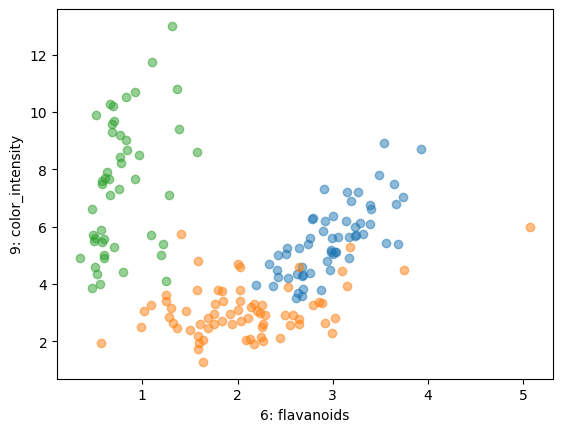

In [16]:
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)

plt.show()

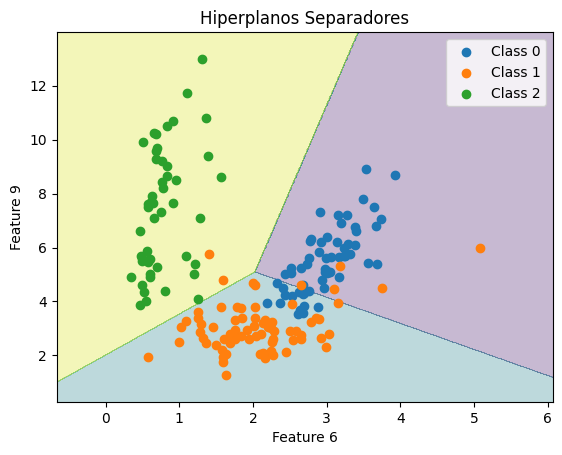

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Seleciona apenas as duas primeiras características para visualização
X69 = X[:, [6, 9]]

modelo.fit(X69, y)

# Determina os limites do gráfico
x_min, x_max = X69[:, 0].min() - 1, X69[:, 0].max() + 1
y_min, y_max = X69[:, 1].min() - 1, X69[:, 1].max() + 1

# Cria uma grade de pontos para a visualização dos hiperplanos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Calcula as distâncias dos pontos à superfície de decisão
Z = np.c_[xx.ravel(), yy.ravel()]

ypred = modelo.predict(Z)

# Plota os hiperplanos separadores
plt.contourf(xx, yy, ypred.reshape(xx.shape), alpha=0.3)

# Plota os pontos de dados originais
for k in set(y):
    plt.scatter(X69[y == k][:, 0], X69[y == k][:, 1], label=f'Class {k}')

plt.xlabel('Feature 6')
plt.ylabel('Feature 9')
plt.legend()
plt.title('Hiperplanos Separadores')
plt.show()
